# Project 2 - Supervised Machine Learning - Regression

# Objective
The main objective of my analysis is to focus on **prediction** of the car price based on the dataset described below.

# About the Data

The dataset includes the pricing of the cars belonging to Audi brand based on the variations such as size, mileage, fuel type, age of the car, etc. 

The dataset can be accessed from the [Kaggle](https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes)

The variables of the dataset are as follows:

**model** - model name of Audi car

**year** - registration year

**price** - price in Euros

**transmission** - type of gearbox

**mileage** - distance used

**fuelType** - engine fuel

**tax** - road tax

**mpg** - miles per gallon

**engineSize** - size in litres

# Import Packages

In [23]:
%config Completer.use_jedi = False
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold

# Load Dataset

In [3]:
data = pd.read_csv('audi.csv')
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
data.shape

(10668, 9)

In [5]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


# EDA

- Finding Missing Values.
- Check for discrete and continuous variables for easy visualization.
- Correlation Matrix/Heatmap for finding relationship between independent variables and dependent variable.
- Also the heatmap depicts the correlation between the feature sets so that one of the correlated features can be dropped.
- Using Countplot, find the distribution of each feature individually and also wrt dependent variable.
- Find the balance in the dependent variable, so that necessary steps can be taken.
- Outliers Correction and Distribution Graph for better understanding of data with dependent variable.

In [6]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
for feature in data.columns:
    print(feature, ':', len(data[feature].unique()))
#     print(feature, ':', data[feature].unique())
    print()

model : 26

year : 21

price : 3260

transmission : 3

mileage : 7725

fuelType : 3

tax : 37

mpg : 104

engineSize : 19



In [8]:
discrete_features = ['model', 'transmission', 'fuelType']
continuous_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
        
print('Discrete Features:', discrete_features)
print('Continuous Features:', continuous_features)

Discrete Features: ['model', 'transmission', 'fuelType']
Continuous Features: ['year', 'mileage', 'tax', 'mpg', 'engineSize']


### Observations:
- There is no missing part in the dataset.
- There are 3 Discrete and 5 Continuous Features with *price* as dependent variable.

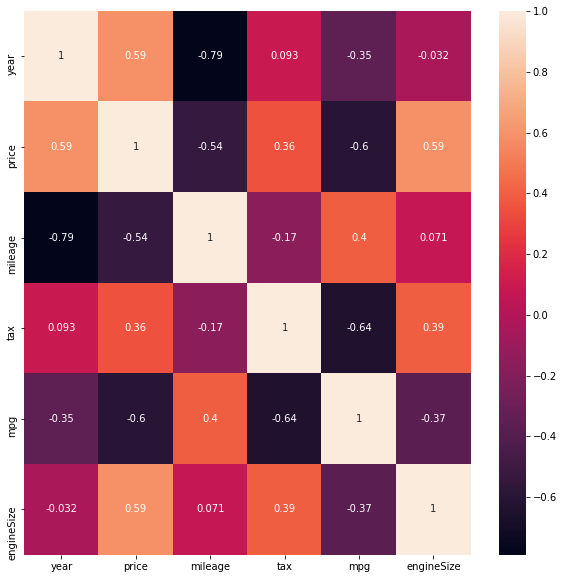

In [9]:
correlation = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True)
plt.show()

### Observations:
- **year, tax and engineSize are positively correlated to price.**
- Older the car, less the value of car gets.
- Tax is directly proportional to price as various taxations are added to the price.
- Engine Size and proportional more powerful engines tend to have higher price.


- **Negative Correlations are between mpg and tax, mileage and year.**
- MPG mostly differentiate between sports and regular cars, thus one with less MPG or sport cars are having high taxations and vice versa.
- Older the car is, more the mileage it has, as the car is travelled more.

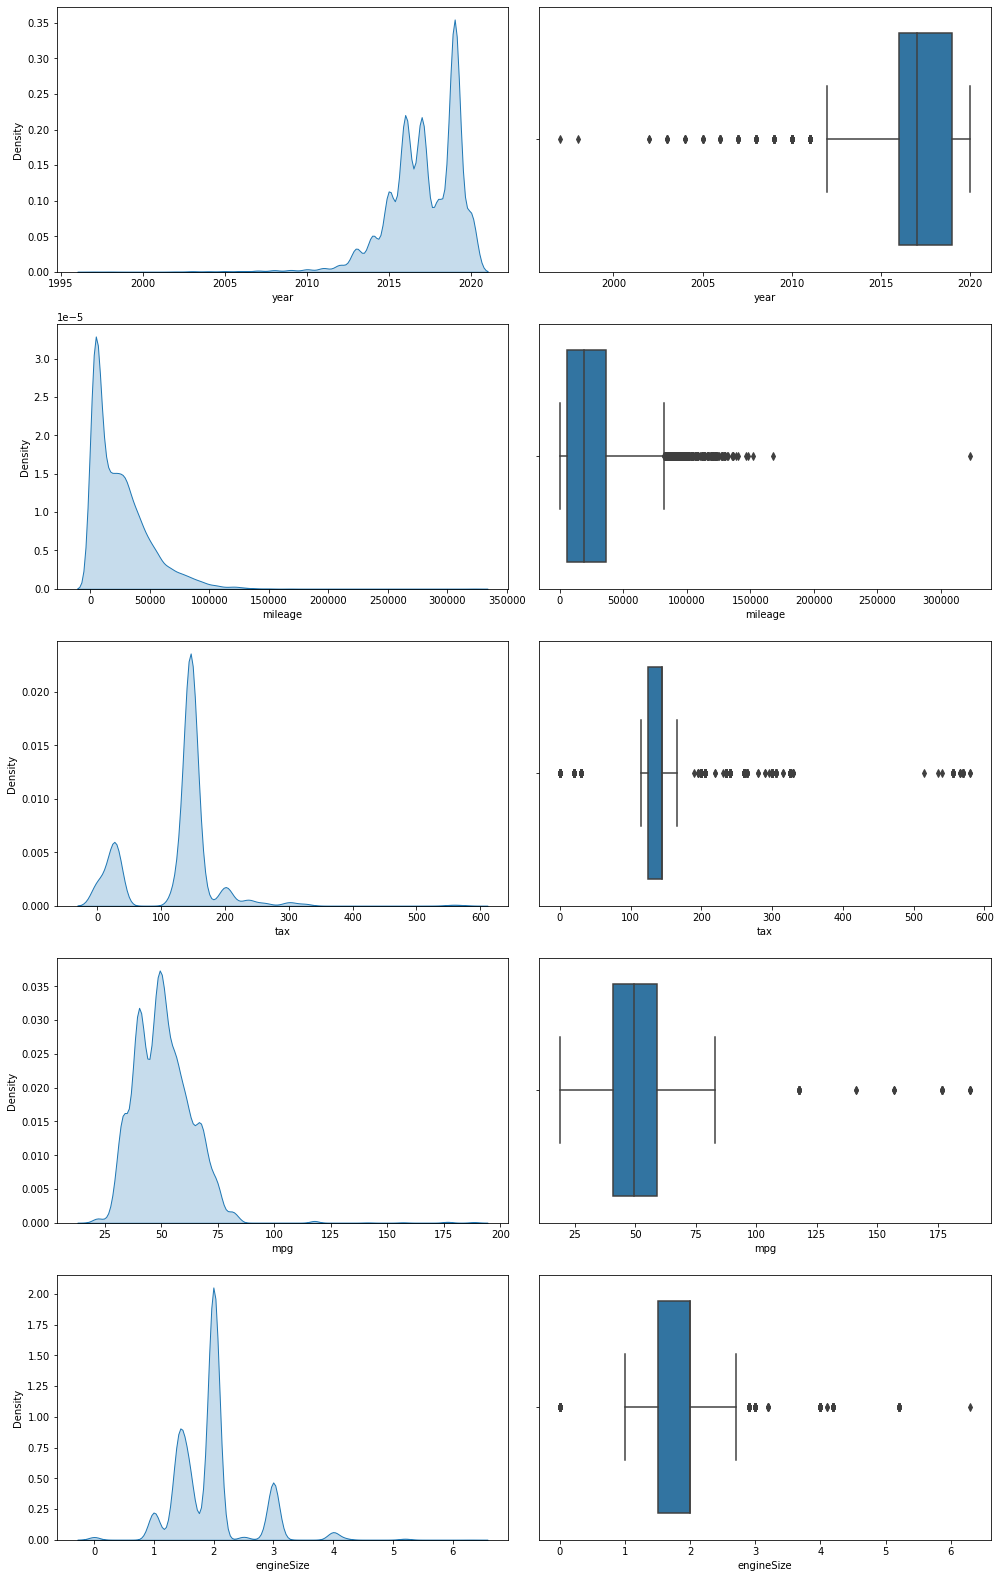

In [10]:
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(14,22))

for i in range(len(continuous_features)):
    sns.kdeplot(ax=ax[i, 0], x=continuous_features[i], data=data, fill = True)
    sns.boxplot(ax=ax[i, 1], x=continuous_features[i], data=data)
fig.tight_layout(pad=1)
plt.show()

### Observations:
- There is a lot of outliers with tax and mileage features.
- The data distribution is also uneven and most of them being with skewed to the side rather than a Gaussian distribution.

<AxesSubplot:xlabel='transmission', ylabel='count'>

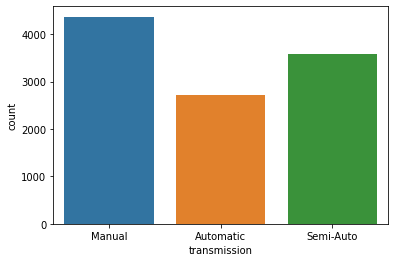

In [11]:
sns.countplot(x = "transmission", data = data)

### Observations:
- This countplot shows us that there are around 4000+ cars which are of Manual Transmission in UK. Around 2500+ cars which are Automatic Transmission in UK and around 3500+ Cars which are Semi-Auto transmission.

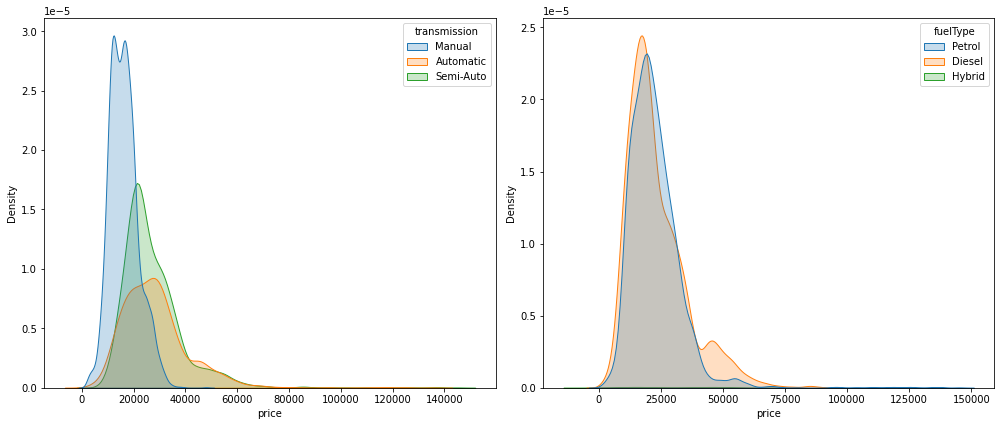

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

sns.kdeplot(ax=ax[0], x='price', hue='transmission', data=data, fill = True)
sns.kdeplot(ax=ax[1], x='price', hue='fuelType', data=data, fill = True)

fig.tight_layout(pad=1)
plt.show()

In [13]:
Counter(data['fuelType'])

Counter({'Petrol': 5063, 'Diesel': 5577, 'Hybrid': 28})

<AxesSubplot:xlabel='count', ylabel='model'>

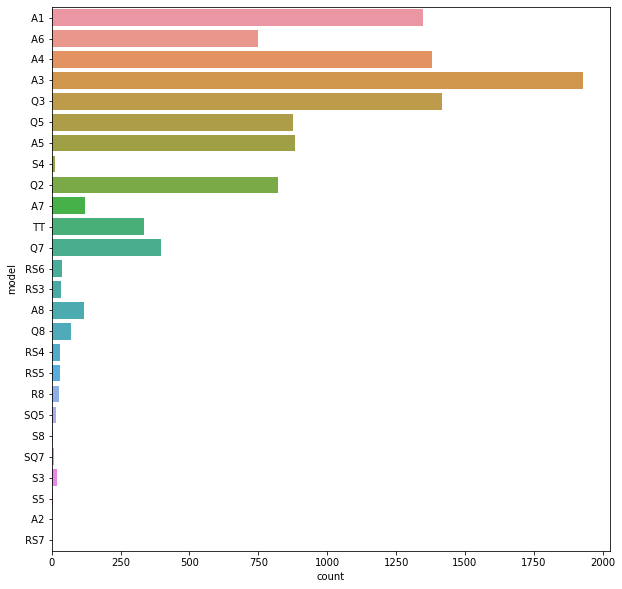

In [14]:
plt.figure(figsize = (10,10))
sns.countplot(y=data['model'])

### Observations:
- About transmission feature, manual transmission have higher density in lower price bracket, while auto and semi-auto have a downwards density towards higher price range.


- Talking about fuelType, Petrol and Diesel are most dominant and quite overlapping.
- Hybrid has very few traces on the graph, so for better understanding we can look at the count which is just 28 compared to others falling in thousands.


- In the car model counts, the customer-centric or budget cars have higher counts while the luxury segment has lesser counts.

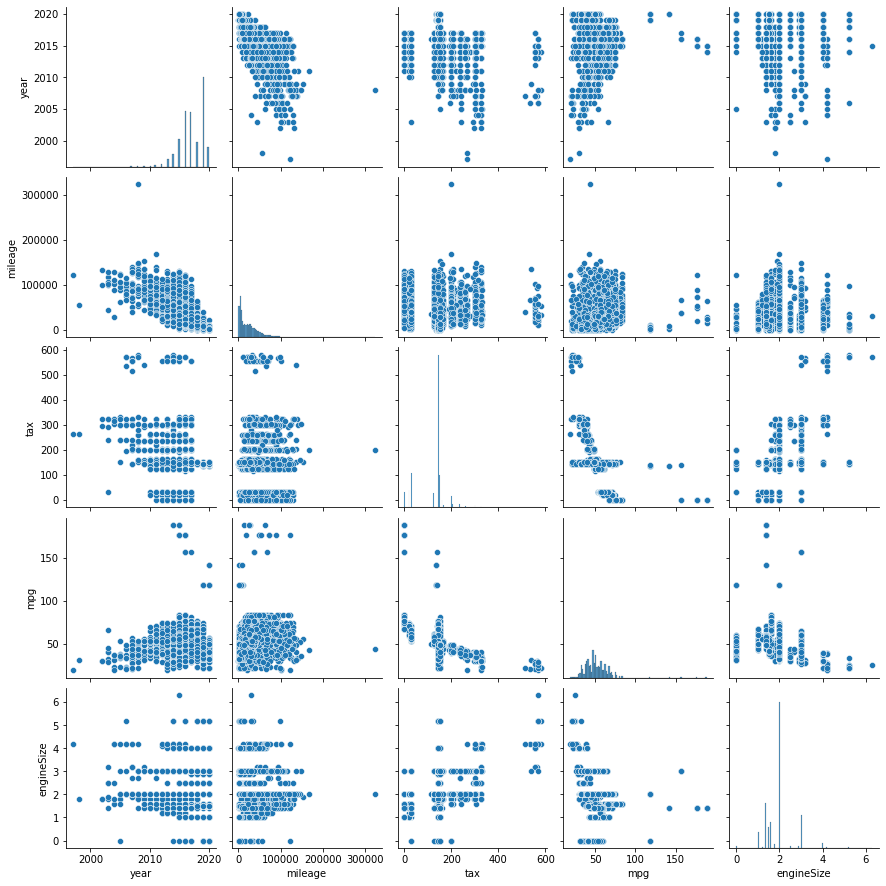

In [15]:
sns.pairplot(data[continuous_features])

# Feature Engineering

### Label Encoding

In [16]:
clean_data = data.copy()
clean_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [17]:
encoder = LabelEncoder()
clean_data['model'] = encoder.fit_transform(clean_data['model'])
clean_data['transmission'] = encoder.fit_transform(clean_data['transmission'])
clean_data['fuelType'] = encoder.fit_transform(clean_data['fuelType'])

In [18]:
clean_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0


### Outlier Treatment

In [19]:
clean_data = clean_data[clean_data['year'] >= 2000]
clean_data = clean_data[clean_data['mileage'] <= 200000]
clean_data = clean_data[clean_data['mpg'] <= 100]

### Temporal Variable Changes on Year Column

In [20]:
clean_data['year'] = 2022 - clean_data['year']

In [21]:
clean_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,5,12500,1,15735,2,150,55.4,1.4
1,5,6,16500,0,36203,0,20,64.2,2.0
2,0,6,11000,1,29946,2,30,55.4,1.4
3,3,5,16800,0,25952,0,145,67.3,2.0
4,2,3,17300,1,1998,2,145,49.6,1.0


# Model Building

In [24]:
X = clean_data.drop(['price'], axis=1)
y = clean_data['price']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, X_test.shape)
print(len(y_train))

(7974, 8) (2658, 8)
7974


In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
r2 = r2_score(y_pred, y_test)
print('R2 Score:', r2)

mse = mean_squared_error(y_pred, y_test)
print('MSE:', mse)

R2 Score: 0.775017245866197
MSE: 25685633.418716412


In [26]:
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lin_reg.fit(X_train_poly, y_train)
y_pred = lin_reg.predict(X_test_poly)
r2 = r2_score(y_pred, y_test)
print('R2 Score:', r2)

mse = mean_squared_error(y_pred, y_test)
print('MSE:', mse)

R2 Score: 0.9357971682313895
MSE: 8658138.730032763


In [27]:
ridge_reg = Ridge(alpha=0.001)
ridge_reg.fit(X_train_poly, y_train)
y_pred = ridge_reg.predict(X_test_poly)
r2 = r2_score(y_pred, y_test)
print('R2 Score:', r2)

mse = mean_squared_error(y_pred, y_test)
print('MSE:', mse)

R2 Score: 0.936419999626438
MSE: 8484330.067345886


In [28]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train_poly, y_train)
y_pred = lasso_reg.predict(X_test_poly)
r2 = r2_score(y_pred, y_test)
print('R2 Score:', r2)

mse = mean_squared_error(y_pred, y_test)
print('MSE:', mse)

R2 Score: 0.9348386418450341
MSE: 8645505.89193321


c:\users\mahim\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31647857539.107548, tolerance: 107791180.50995123
  model = cd_fast.enet_coordinate_descent(


# Best Model to Choose

| Models                        | R2 Score | Mean Square Error |
|-------------------------------|----------|-------------------|
| Basic Linear Regression       | 0.775    | 25685633.418      |
| Linear Regression with poly=3 | 0.9357   | 8658138.730       |
| **Ridge Regression**          |**0.9364**| **8484330.067**   |
| Lasso Regression              | 0.9348   | 8645505.892       |

Based on the R2 score and Mean square error of each of the models created, **Ridge Regression** worked based marginally compared to the peer models. The R2 is 0.9364 and MSE be 8484330.067.

# Summary Key Findings and Insights
- There is no missing part in the dataset.
- There are 3 Discrete and 5 Continuous Features with price as dependent variable.
- year, tax and engineSize are positively correlated to price.
- Older the car, less the value of car gets.
- Tax is directly proportional to price as various taxations are added to the price.
- Engine Size and proportional more powerful engines tend to have higher price.
- Negative Correlations are between mpg and tax, mileage and year.
- MPG mostly differentiate between sports and regular cars, thus one with less MPG or sport cars are having high taxations and vice versa.
- Older the car is, more the mileage it has, as the car is travelled more.
- There is a lot of outliers with tax and mileage features.
- The data distribution is also uneven and most of them being with skewed to the side rather than a Gaussian distribution.
- This countplot shows us that there are around 4000+ cars which are of Manual Transmission in UK. Around 2500+ cars which are Automatic Transmission in UK and around 3500+ Cars which are Semi-Auto transmission.
- About transmission feature, manual transmission have higher density in lower price bracket, while auto and semi-auto have a downwards density towards higher price range.
- Talking about fuelType, Petrol and Diesel are most dominant and quite overlapping.
- Hybrid has very few traces on the graph, so for better understanding we can look at the count which is just 28 compared to others falling in thousands.
- In the car model counts, the customer-centric or budget cars have higher counts while the luxury segment has lesser counts.

# Future Scope
- Ahead while revisiting the model again, I have plans to do more in-depth analysis of the data. 
- To remove unimportant features from the data based on feature importance.
- Can try different regressors to train the model and also few ensemble methods as well to see any improvement.